# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **READING THE DATASET**

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [51]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **DATA INSPECTION**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# No. of rows and columns
rows = len(df.axes[0])
columns = len(df.axes[1])

print('Total Rows ==',rows)
print('Total Columns ==',columns)

Total Rows == 7787
Total Columns == 12


In [ ]:
# Checking Duplicates
df.duplicated().value_counts()

False    7787
dtype: int64

**As we can see there are no duplicates in our dataset**

In [ ]:
# Checking null values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**As we can see there are there are---**

*    2389 null values in director column.
*   718 in cast column 507 in country.
*   507 in country column. 
*   10 in date_added and 7 in rating column.




# **DATA CLEANING**

In [4]:
# Filling the null values 
df['country'].fillna(value='others',inplace=True)
df['cast'].fillna(value='no info',inplace=True)

In [5]:
# Dropping the null values in rating and dated_added column as they contains insignificant amount of null values
df.dropna(subset=['date_added','rating'],inplace=True)

In [6]:
# Dropping the Director column as we won't be needing it and approx. 30% values are null
df.drop(['director'],axis = 1,inplace = True)

In [7]:
# Checking again
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Rating column**

In [8]:
# Checking unique values in rating
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**-- As we can see the values in the rating column values are difficult to understand**


**-- So we are going to replace the original values with the four age groups given below**

**I have divided the age groups into four categories**

1.   **Kids  ==  3 - 7 years**
2.   **Older kids ==  8 - 13 years**
3.   **Teens  ==  14 - 18 years**
4.   **Adults ==  18+ years**











In [9]:
# Replacing the original values
values = {'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}


df['rating'].replace(values, inplace =True)    

In [10]:
df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   date_added    7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
dtypes: int64(1), object(10)
memory usage: 728.4+ KB


In [12]:
# Converting date_added column into datatime
df['date_added'] = pd.to_datetime(df['date_added'])

In [13]:
# Extracting year and month from date_added
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

# **EDA**

**Before starting EDA first we will divide the dataset into two subsets. one for movies and other for Tv shows.**

*   **In this way it would be easier for us to perform EDA and gain valuable insights**




In [14]:
# Creating Two subsets of the original Dataset
netflix_movies = df[df['type'] == 'Movie']
netflix_tv = df[df['type'] == 'TV Show']

In [15]:
# Defining a ploting function
def count_order(column, color_palette):
  '''
  this function plots counplot with order parameter
  '''
  plt.figure(figsize = (8,5))
  sns.countplot(column, palette = color_palette, order =column.value_counts().index[:10])
  plt.xticks(rotation = 70)
  plt.show()  

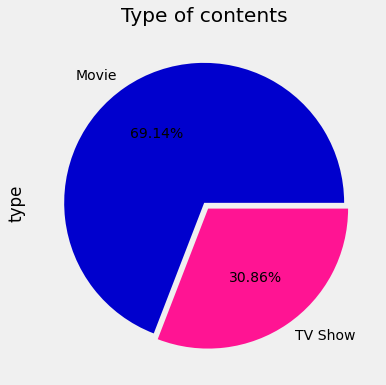

In [16]:
# Type of content available on netflix
content_type = df['type'].value_counts()
plt.figure(figsize = (8,6))
content_type.plot(kind  = 'pie' , explode =[0,0.05], colors = ['mediumblue','deeppink'] , autopct = '%.2f%%' )
plt.title('Type of contents')
plt.show()

**Inference**


*   **AS we can see there are more movies available in netflix than TV Show**




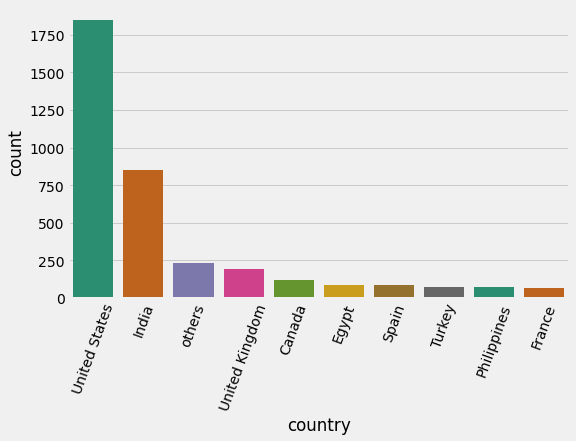

In [17]:
# Netflix movies country wise
count_order(netflix_movies['country'], 'Dark2',)

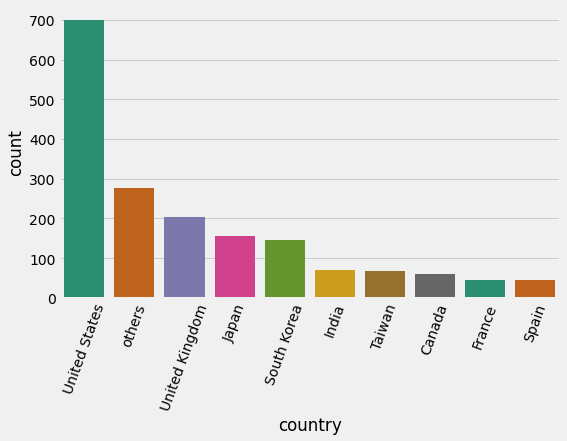

In [18]:
# Netflix TV Shows country wise
count_order(netflix_tv['country'], 'Dark2')

**INFERENCE**


*   **IN TERMS OF MOVIES**
> US has most number of movies on netflix followed by India.




*   **IN TERMS OF TV SHOWS**
> Again US has most number of TV Show on netflix followed by others and UK.












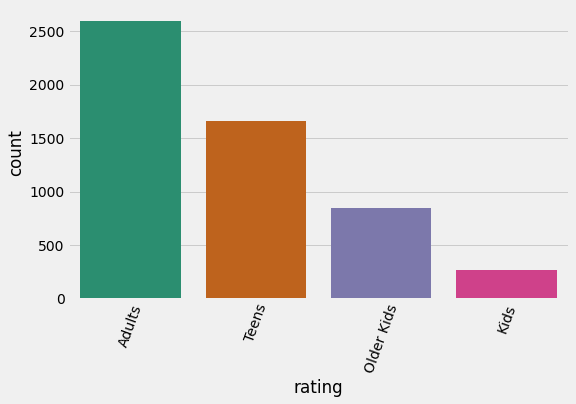

In [19]:
# Content ratings of movies on netflix
count_order(netflix_movies['rating'], 'Dark2')

**INFERENCE**

*   From above plot we can see that number of movies rated for adults are the most followed by movies rated for teens.



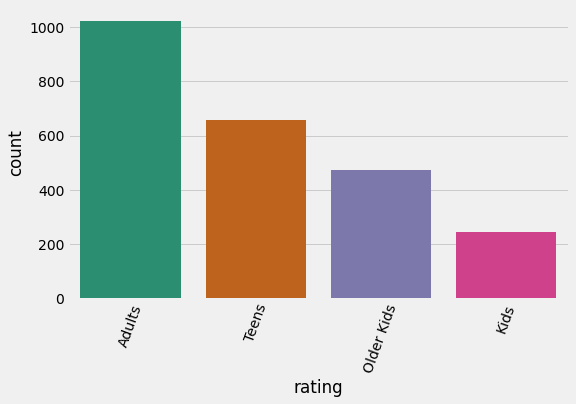

In [20]:
# Content rating of TV Show on netflix
count_order(netflix_tv['rating'], 'Dark2')

**INFERENCE**


*   Again we can see that most number of TV Shows are adult rated followed by Show rated for Teens. 



Text(0.5, 0, 'Count')

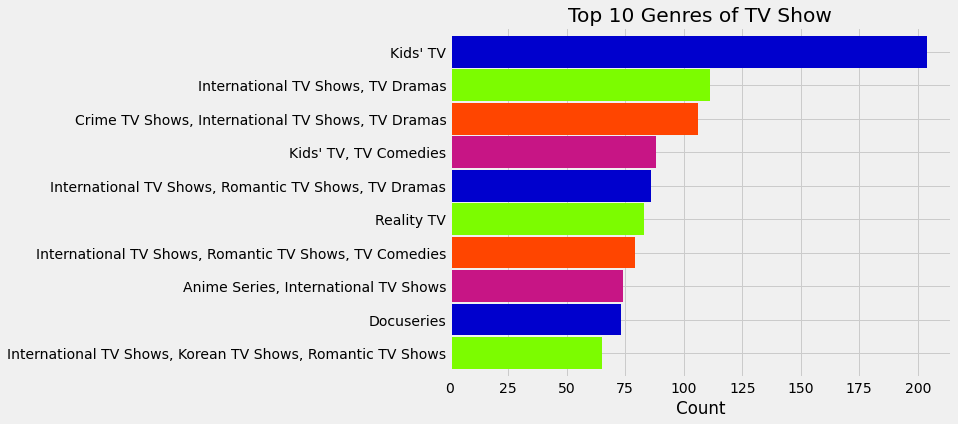

In [21]:
# Top 10 genres of TV shows on netflix
plt.figure(figsize = (8,6))
colors = ['lawngreen', 'mediumblue',  'mediumvioletred','orangered']
netflix_tv['listed_in'].value_counts()[:10].sort_values(ascending = True).plot(kind='barh',width = 0.95, color = colors)
plt.title('Top 10 Genres of TV Show')
plt.xlabel('Count')

**INFERENCE**

*   The top most genre for TV Show is Kid's TV followed by Internation TV Shows, TV Dramas.


Text(0.5, 0, 'Count')

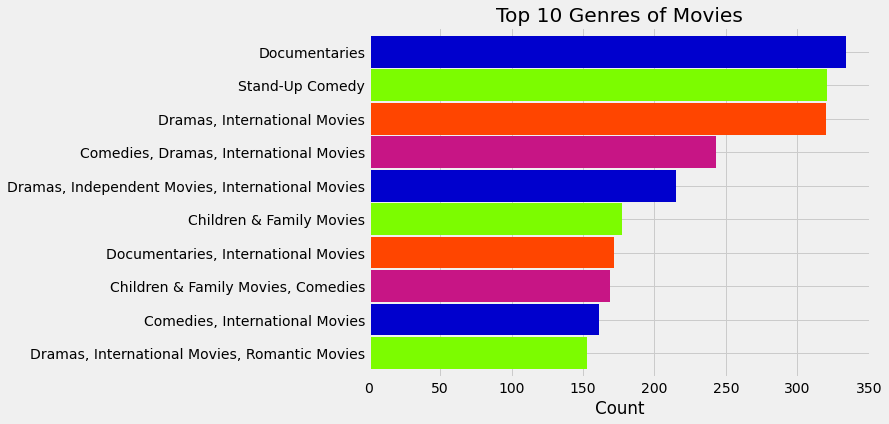

In [22]:
# Top 10 genres of movies on netflix
plt.figure(figsize = (8,6))
colors1 = ['midnightble', 'darkgreen', 'darkviolet','red']
netflix_movies['listed_in'].value_counts()[:10].sort_values(ascending = True).plot(kind='barh',width = 0.95, color = colors)
plt.title('Top 10 Genres of Movies')
plt.xlabel('Count')

**INFERENCE**

*   The top most genres for movies in netflix is Documentaries followed by Stand-Up Comedy.




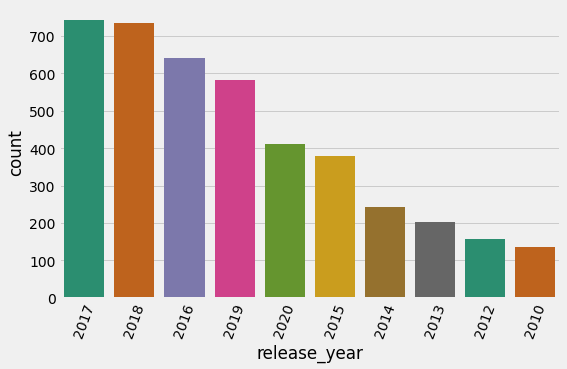

In [23]:
# Top 10 Movies release year
count_order(netflix_movies['release_year'], 'Dark2')

**INFERENCE**

1.   Most number of movies available on netflix are released in year 2017
followed by year 2018.

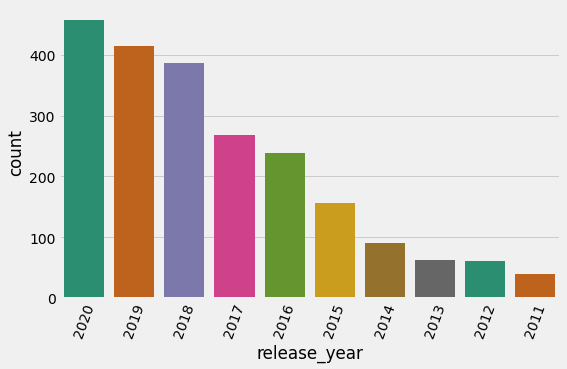

In [24]:
# Top 10 release year of TV Shows
count_order(netflix_tv['release_year'], 'Dark2')

**INFERENCE**


*  Out of all available TV Shows on netflix most Shows were released in the year 2020.



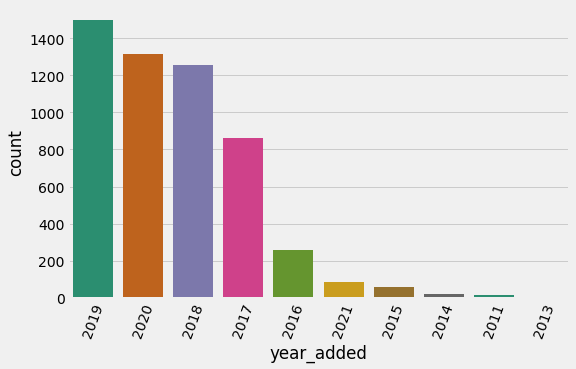

In [25]:
# Let's see in which year most number of movies and TV Shows were added into the netflix
count_order(netflix_movies['year_added'], 'Dark2')

**INFERENCE**


*   We can clearly see that most number of movies were added in the year 2019 on the netflix platform followed by the year 2020.



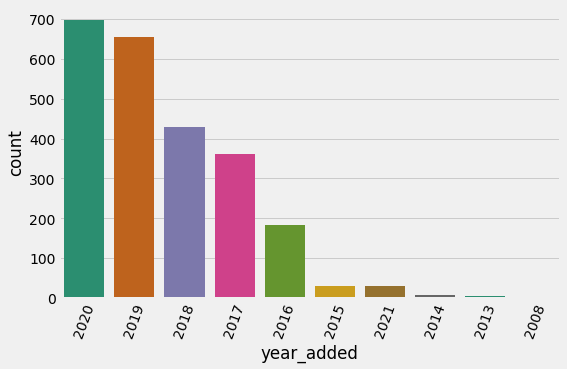

In [26]:
count_order(netflix_tv['year_added'], 'Dark2')

**INFERENCE**

*   As for TV Shows most number of TV Show were added in the year 2020 followed by the year 2019.


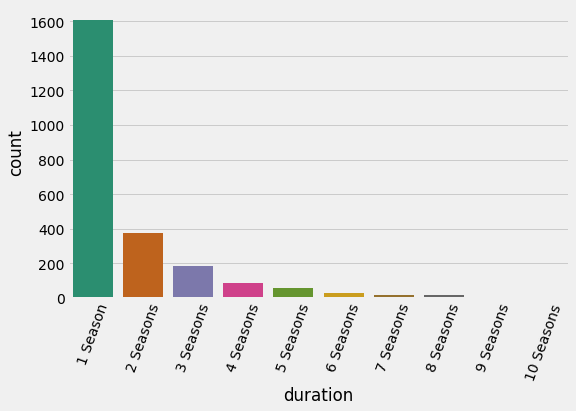

In [27]:
#  Duration of TV Shows on netflix 
count_order(netflix_tv['duration'], 'Dark2')

**INFERENCE**

*   From above plot we can clearly see that maximum  TV Shows on netflix have only one season. 


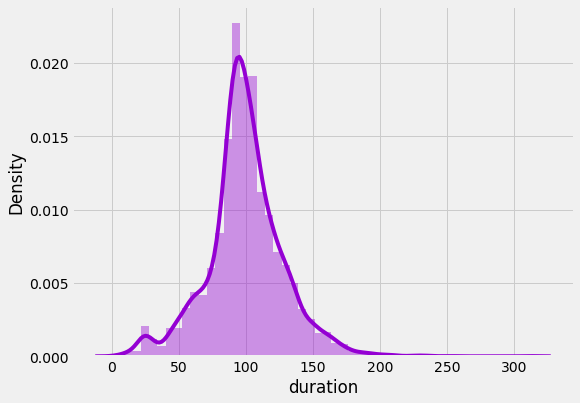

In [28]:
# Duration of Movies available on Netflix
movies_length = netflix_movies['duration'].str[:-3]
plt.figure(figsize = (8,6))
sns.distplot(movies_length, color = 'darkviolet')
plt.show()

**INFERENCE**

*   Most Movies on Netflix are having runtime of between 80 to 120 mins approx.


# **DATA PREPROCESSING**

In [29]:
# Importing Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

 **Removing punctuations**

In [30]:
# Defining a function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [52]:
# Applying the function 
df['description'] = df['description'].apply(remove_punctuation)

**Removing Stopwords**

In [31]:
# extracting the stopwords
stop_words = stopwords.words('english')

In [32]:
# Defining a function to remove stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    
    return " ".join(text)

In [53]:
# Applying the function
df['description'] = df['description'].apply(remove_stopwords)

In [54]:
df['description'].iloc[:5]

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

**Applying Stemming**

In [35]:
# Instantiating Snowball stemmer
sb_stemmer = SnowballStemmer('english')

In [36]:
# Defining stemming function
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [sb_stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [55]:
# Applying Stemming
df['description'] = df['description'].apply(stemming)

In [56]:
df['description'].iloc[:5]

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: description, dtype: object

**TFIDF VECTORIZER**

In [61]:
# Applying tfidf vectorizer
tfidf = TfidfVectorizer(max_features = 10000)

X = tfidf.fit_transform(df['description'])

In [62]:
X.shape

(7787, 10000)

# **ALGORITHMS**

In [41]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score




# 1. K-MEANS



Text(0, 0.5, 'WCSS')

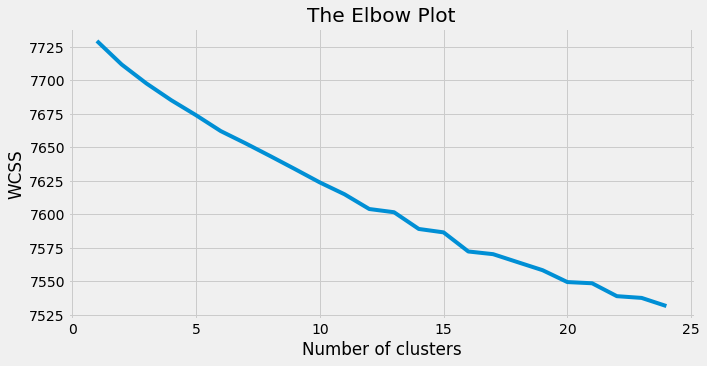

In [65]:
# Fnding optimal number of clusters 

# Elbow plot
wcss = []

for i in range(1,25):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(10,5))
plt.plot(range(1,25),wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

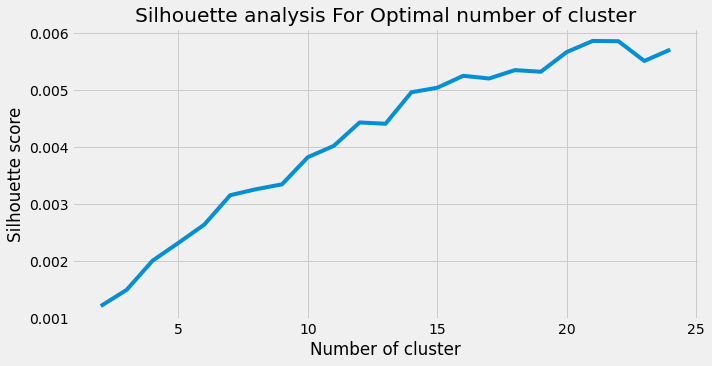

In [66]:
# Using silhouette score to get optimal value of k
silh_score = [] 
for i in range(2,25):
    kmeans = KMeans(n_clusters=i,init ='k-means++',random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    score = silhouette_score(X,cluster_labels)
    silh_score.append(score)

# plotting value of k with coresponding silhouette score
plt.figure(figsize=(10,5))
plt.plot(range(2,25),silh_score)
plt.xlabel('Number of cluster') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal number of cluster')
plt.show()


*   **From silhouette score analysis we got highest score at 22 so we will be forming 22 clusters.**





In [67]:
# Applying K-means algorithm with 22 clusters
kmeans = KMeans(n_clusters=22,init='k-means++',random_state=42)
kmeans.fit(X)

KMeans(n_clusters=22, random_state=42)

In [68]:
kmeans.inertia_

7538.901619929228

In [72]:
kmeans_silh_score = silhouette_score(X,kmeans.labels_)
kmeans_silh_score

0.005851713531382036

In [73]:
# Adding new column in the dataset "cluster number"
df['cluster_number'] = kmeans.labels_

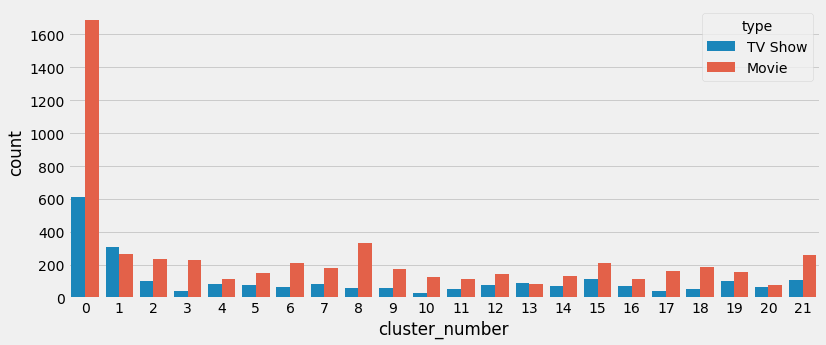

In [78]:
# Let's check number of data points in each clusters
plt.figure(figsize = (12,5))
sns.countplot(x = 'cluster_number' , data = df, hue = 'type') 

**We see that most number of data points are in the cluster number 0**